In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import os

import seaborn as sns
import pandas as pd

In [2]:
path = '/Users/dangoldberg/Downloads/ammar_TrRBM/exp_data'

files = os.listdir(path)
files

['.DS_Store',
 '.ipynb_checkpoints',
 '2DMountainCar_2DCartPole_no_transfer.pkl',
 '2DMountainCar_2DCartPole_no_transfer1.pkl',
 '2DMountainCar_2DCartPole_with_transfer_random.pkl',
 '2DMountainCar_2DCartPole_with_transfer_random1.pkl',
 '2DMountainCar_2DCartPole_with_transfer_random_use_q.pkl',
 '2DMountainCar_2DCartPole_with_transfer_random_use_q1.pkl',
 '2DMountainCar_2DCartPole_with_transfer_realistic.pkl',
 '2DMountainCar_2DCartPole_with_transfer_realistic1.pkl',
 '2DMountainCar_2DCartPole_with_transfer_realistic_use_q.pkl',
 '2DMountainCar_2DCartPole_with_transfer_realistic_use_q1.pkl',
 '2DMountainCar_3DMountainCar_no_transfer.pkl',
 '2DMountainCar_3DMountainCar_random_Transferred_Optimal.pkl',
 '2DMountainCar_3DMountainCar_realistic_Transferred_Optimal.pkl',
 '2DMountainCar_3DMountainCar_with_transfer_random.pkl',
 '2DMountainCar_3DMountainCar_with_transfer_random_use_q.pkl',
 '2DMountainCar_3DMountainCar_with_transfer_realistic.pkl',
 '2DMountainCar_3DMountainCar_with_transfer

In [23]:
# modify this to specify plot you want to make

focus = 'Acrobot_2DCartPole'
xlimit = 260
#value = 'Rewards'
value = 'Rewards'


['no_transfer', 'with_transfer_random', 'with_transfer_random_use_q', 'with_transfer_realistic', 'with_transfer_realistic_use_q']


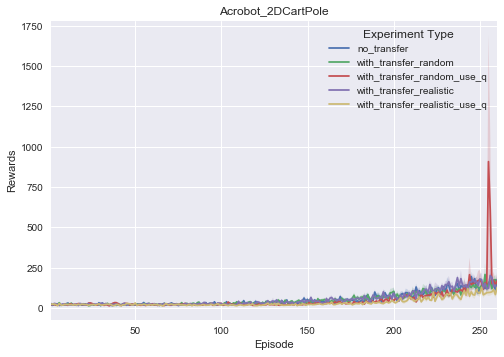

In [24]:

#don't need to touch this part

filenames = [name for name in files if (focus in name) and ('Optimal' not in name)]
filenames
exps = [filenames[n][len(focus)+1:-4].lower() for n in range(len(filenames))]
print(exps)


tot_df = None
for filename, exp in zip(filenames,exps):
    file = np.load(path+'/'+filename)
    if len(file) == 4:
        file = np.array(file[2])
    else:
        file = np.array(file[0])
    for n in [a for a in range(10)]:
        
        if focus == '2DMountainCar_3DMountainCar':
            test = file[n,:]
        else:
            test = np.array(file[n])
        cum = np.cumsum(test)

        idx = np.arange(1,len(test)+1)
        test = np.concatenate([idx.reshape(-1,1),test.reshape(-1,1),cum.reshape(-1,1)],axis=1)[:xlimit]

        test_df = pd.DataFrame(test)
        test_df.columns = ['Episode','Rewards','Cumulative Rewards']
        test_df['Experiment Number'] = n
        
        if exp[-1] == '1':
            test_df['Experiment Type'] = exp[:-1]
            test_df['Experiment Number'] = n+10
        else:
            test_df['Experiment Type'] = exp

        if tot_df is None:
            tot_df = test_df
        else:
            tot_df = pd.concat([tot_df,test_df],axis=0)

sns.tsplot(data=tot_df, ci=[68], time="Episode", value=value,
                 unit="Experiment Number", condition="Experiment Type")

plt.title(focus)
plt.show()



In [10]:
filenames

[]

In [176]:
set(filenames) - {'realistic_transferred_optimal','random_transferred_optimal'}

{'2DMountainCar_3DMountainCar_no_transfer.pkl',
 '2DMountainCar_3DMountainCar_random_Transferred_Optimal.pkl',
 '2DMountainCar_3DMountainCar_realistic_Transferred_Optimal.pkl',
 '2DMountainCar_3DMountainCar_with_transfer_random.pkl',
 '2DMountainCar_3DMountainCar_with_transfer_random_use_q.pkl',
 '2DMountainCar_3DMountainCar_with_transfer_realistic.pkl',
 '2DMountainCar_3DMountainCar_with_transfer_realistic_use_q.pkl'}